##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 14

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Adithyashailender Umesh,Amarjeet Mohanty,Dhananjay Rao TS,Bilal Shaikh,Abhishek Kali Madki

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021AAPS2220H,2021AAPS0560H,2021AAPS0321H,2021A3PS0855H,2021AAPS0550H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

## Loading Data and Handling Missing values

We have obtained the names of the columns and have added them into the pandas dataframe while loadin

In [ ]:

columns=["hospital",
"age",
"sex",
"cp",
"trestbps",
"chol",
"fbs",
"restecg",
"thalach",
"exang",
"oldpeak",
"slope",
"ca",
"thal",
"num"
]
df=pd.read_excel("Heart_Disease.xlsx",header=None,names=columns)
df.head()

,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,Cleveland,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


There are 15 columns in the dataset , num is the output column and is a categorical variable. Of the remaining features 4 are continous with the rest being categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hospital  920 non-null    object
 1   age       920 non-null    int64 
 2   sex       920 non-null    int64 
 3   cp        920 non-null    int64 
 4   trestbps  920 non-null    object
 5   chol      920 non-null    object
 6   fbs       920 non-null    object
 7   restecg   920 non-null    object
 8   thalach   920 non-null    object
 9   exang     920 non-null    object
 10  oldpeak   920 non-null    object
 11  slope     920 non-null    object
 12  ca        920 non-null    object
 13  thal      920 non-null    object
 14  num       920 non-null    int64 
dtypes: int64(4), object(11)
memory usage: 107.9+ KB


Exploring the various statistical properties of the continous features

In [ ]:

df.describe()

,age,sex,cp,num
count,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,0.995652
std,9.424685,0.408148,0.930969,1.142693
min,28.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000
max,77.000000,1.000000,4.000000,4.000000


On counting the null or nan values in the dataset we are returned with 0, that indicates that there are no missing values.This seems unlikely and needs further verification.

In [ ]:
df.isnull().sum()

hospital    0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df.value_counts()

hospital     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  num
VA           58   1    3   150       219   0    1        118      1      0        ?      ?   ?     2      2
Hungarian    49   0    2   110       ?     0    0        160      0      0        ?      ?   ?     0      2
Cleveland    29   1    2   130       204   0    2        202      0      0        1      0   3     0      1
Switzerland  47   1    3   155       0     0    0        118      1      1        2      ?   3     3      1
             38   1    4   150       0     ?    0        120      1      ?        ?      ?   3     1      1
                                                                                                         ..
Hungarian    32   0    2   105       198   0    0        165      0      0        ?      ?   ?     0      1
                  1    2   110       225   0    0        184      0      0        ?      ?   ?     0      1
                           125   

By opening the dataset manually and looking through the values we came across a lot of "?" in various features. We have assumed here that the nan value were replaced by "?" at some point

In [ ]:

for i in df.columns:
    print(i,df[i][df[i]=="?"].count(),round(df[i][df[i]=="?"].count()/df[i].count()*100,2))


hospital 0 0.0
age 0 0.0
sex 0 0.0
cp 0 0.0
trestbps 59 6.41
chol 30 3.26
fbs 90 9.78
restecg 2 0.22
thalach 55 5.98
exang 55 5.98
oldpeak 62 6.74
slope 309 33.59
ca 611 66.41
thal 486 52.83
num 0 0.0


We can see that ca, thal and slope have a relatively larger proportion of missing values. For ca and thal more than 50% of their values are missing and it easy to justify dropping. We drop slope too as we replacing the it with median or mmode may make the model give one of its values more precedence . All the other columns have their "?" values replaced by their Mode

In [ ]:
#dropping any columns with too many "?" values
df=df.drop(["ca","thal","slope"],axis=1)

#replacing the "?" values in the dataset with the mode of the column
df=df.replace("?",np.nan)
df=df.fillna(df.mode().iloc[0])


## Preprocessing and Exploratory Data Analysis

In [ ]:
Prep=df.copy()

Plotting hsitograms for the various columns to understand the distribution of data

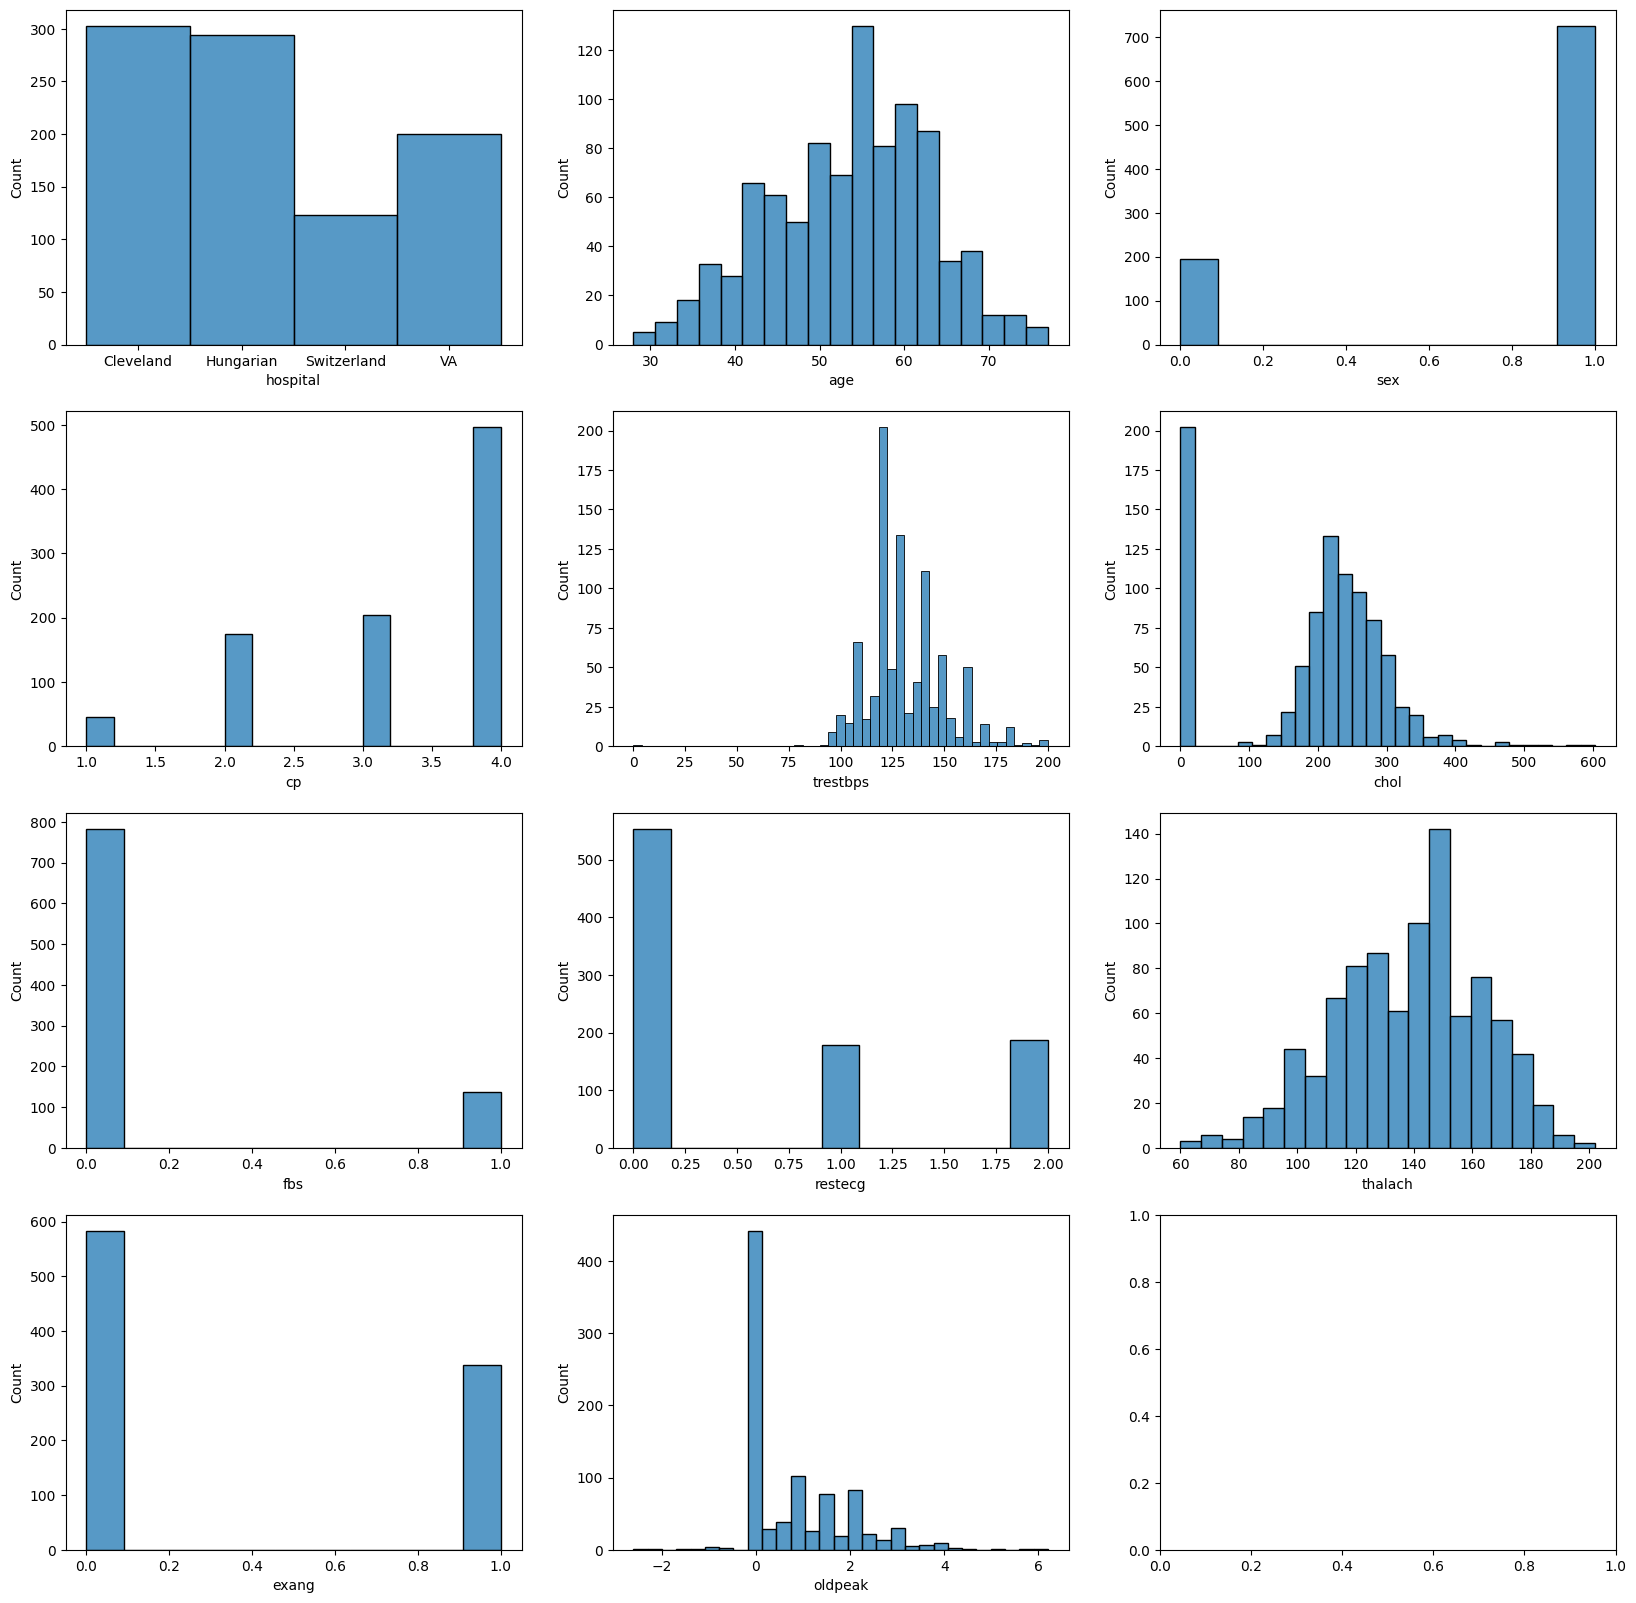

In [ ]:

fig,ax=plt.subplots(4,3,figsize=(20,20))
ax=ax.flatten()
for i in range(0,len(Prep.columns)-1):
    sns.histplot(data=Prep,x=Prep.columns[i],ax=ax[i])
plt.show()

We can see that age, trestbps ,chol ,thalach and oldpeak are numeric continous values while hospital , sex, fbs, restecg ,exang , cp are nominal categorical values.

In [ ]:
cat_var=["hospital",'sex', 'fbs', 'restecg', 'exang' ,"cp"]
num_var=["age", "trestbps", "chol", "thalach", "oldpeak"]
Prep.columns

Index(['hospital', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'num'],
      dtype='object')

Most distributions appear to be well spread out and do not have any obvious anomalies. There is a spike at 0 for oldpeak and chol . cholestrol can never be 0 for a normal human and hence we replace it with the mean, Oldpeak is the ST depression caused by exercise denoted in 0.5 increments and it is possible for it to be undepressed or depressed by a very small margin

In [ ]:
# replace 0s in chol with mean of chol
Prep["chol"]=Prep["chol"].replace(0,Prep["chol"].mean())

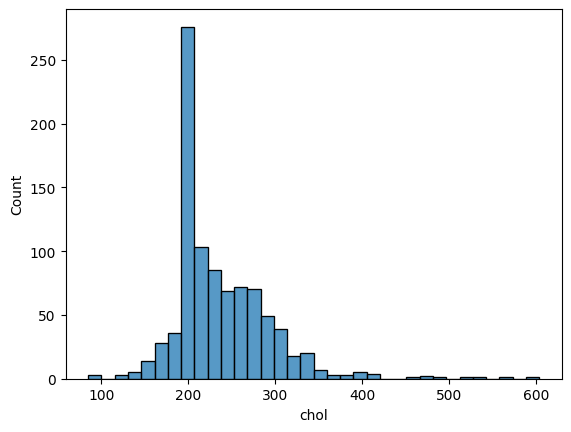

In [ ]:
sns.histplot(data=Prep,x="chol")
plt.show()

In [ ]:
#Normalized value counts of the target variable num
Prep["num"].value_counts(normalize=True)

0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: num, dtype: float64

We see that the target is very heavily unbalanced in favour of 0 which is the value used to encode people not suffering from any heart disease. This unbalanced dataset will make any models trained on it to be heavily biased towards predicting that people do not suffer from any kind of heart disease . It will also be incapable of accurately predicitng of num=4 . So we binarize the num or target column to either 0 or 1 . Where 0 is still anyone who is not suffering from a heart disease and 1 is suffering from it , i.e. the union of 1,2,3,4.

In [ ]:
#Binary encoding the target variable
Prep["num"]=Prep["num"].replace([1,2,3,4],1)

 data handling for One hot encoding and further processing will be more convenient if we  encode the hospital strings with numbers insead . We also change the type of the categorical columns for the same reason.

In [ ]:
#convert hospital values to numeric
Prep["hospital"]=Prep["hospital"].replace(["Cleveland","Hungarian","Switzerland","VA"],[1,2,3,4])
Prep[cat_var]=Prep[cat_var].astype("category")

Here I am defining a function that uses Inter quartile range filtering to detect and removing any outliers

In [ ]:
def outlier_detection(df,columns):
    for i in columns:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ub=q3+1.5*iqr
        lb=q1-1.5*iqr
        print("Number of outliers in ",i,"is",df[i][(df[i]<lb)|(df[i]>ub)].count())
        df=df[(df[i]>lb)&(df[i]<ub)]
    return df

Prep=outlier_detection(Prep,["age","trestbps","chol","thalach","oldpeak"])


Number of outliers in  age is 0
Number of outliers in  trestbps is 28
Number of outliers in  chol is 18
Number of outliers in  thalach is 2
Number of outliers in  oldpeak is 13


In [ ]:
Prep_Disc=Prep.copy()

We are dscretizing the numeric columns to reduce overfitting and making the data easier to handle with models. We have defined the size of the bins based on the normal ranges of these columns in a  healthy human.

trestbps    - <120 : Normal , >120 & <140 : Unhealthy , >140 : Extremely Unhealthy \
chol        - <200 : Normal , >200 & <240 : Unhealthy , >240 : Extremely Unhealthy \
thalach     - <120 : Normal , >120 & <200 : Unhealthy , >200 : Extremely Unhealthy \
oldpeak     - <0 : Unhealthy , >0 & <1 : Normal , >240 : >1 & <3 : Unhealthy , >4 : Extremely Unhealthy


The risk of having a heart attack increases exponentially with age . The lifetime probability of a heart attack is 49% for men and 32% for women. "Only 20% percent of the people who die from Cardiovascular Disease are younger than 65 and almost all of them are between 40-65" . Hence we decided on our split to club people between 0-40 together as the low risk group and club anyone over 60 as very high risk.

src:https://www.ncbi.nlm.nih.gov/books/NBK554410/#:~:text=Age%3A%20CAD%20prevalence%20increases%20after,%25%20and%2032%25%2C%20respectively.




In [ ]:

Prep_Disc["age"]=pd.cut(Prep["age"],bins=[0,40,50,60,100],labels=[1,2,3,4])
Prep_Disc["trestbps"]=pd.cut(Prep["trestbps"],bins=[0,120,140,240],labels=[1,2,3])
Prep_Disc["chol"]=pd.cut(Prep["chol"],bins=[0,200,240,500],labels=[1,2,3])
Prep_Disc["thalach"]=pd.cut(Prep["thalach"],bins=[0,120,150,250],labels=[1,2,3])
Prep_Disc["oldpeak"]=pd.cut(Prep["oldpeak"],bins=[-2,0,1,3,4.5],labels=[1,2,3,4])




We plot the various features coloured by the target variable to see what values are occupied by healthy people

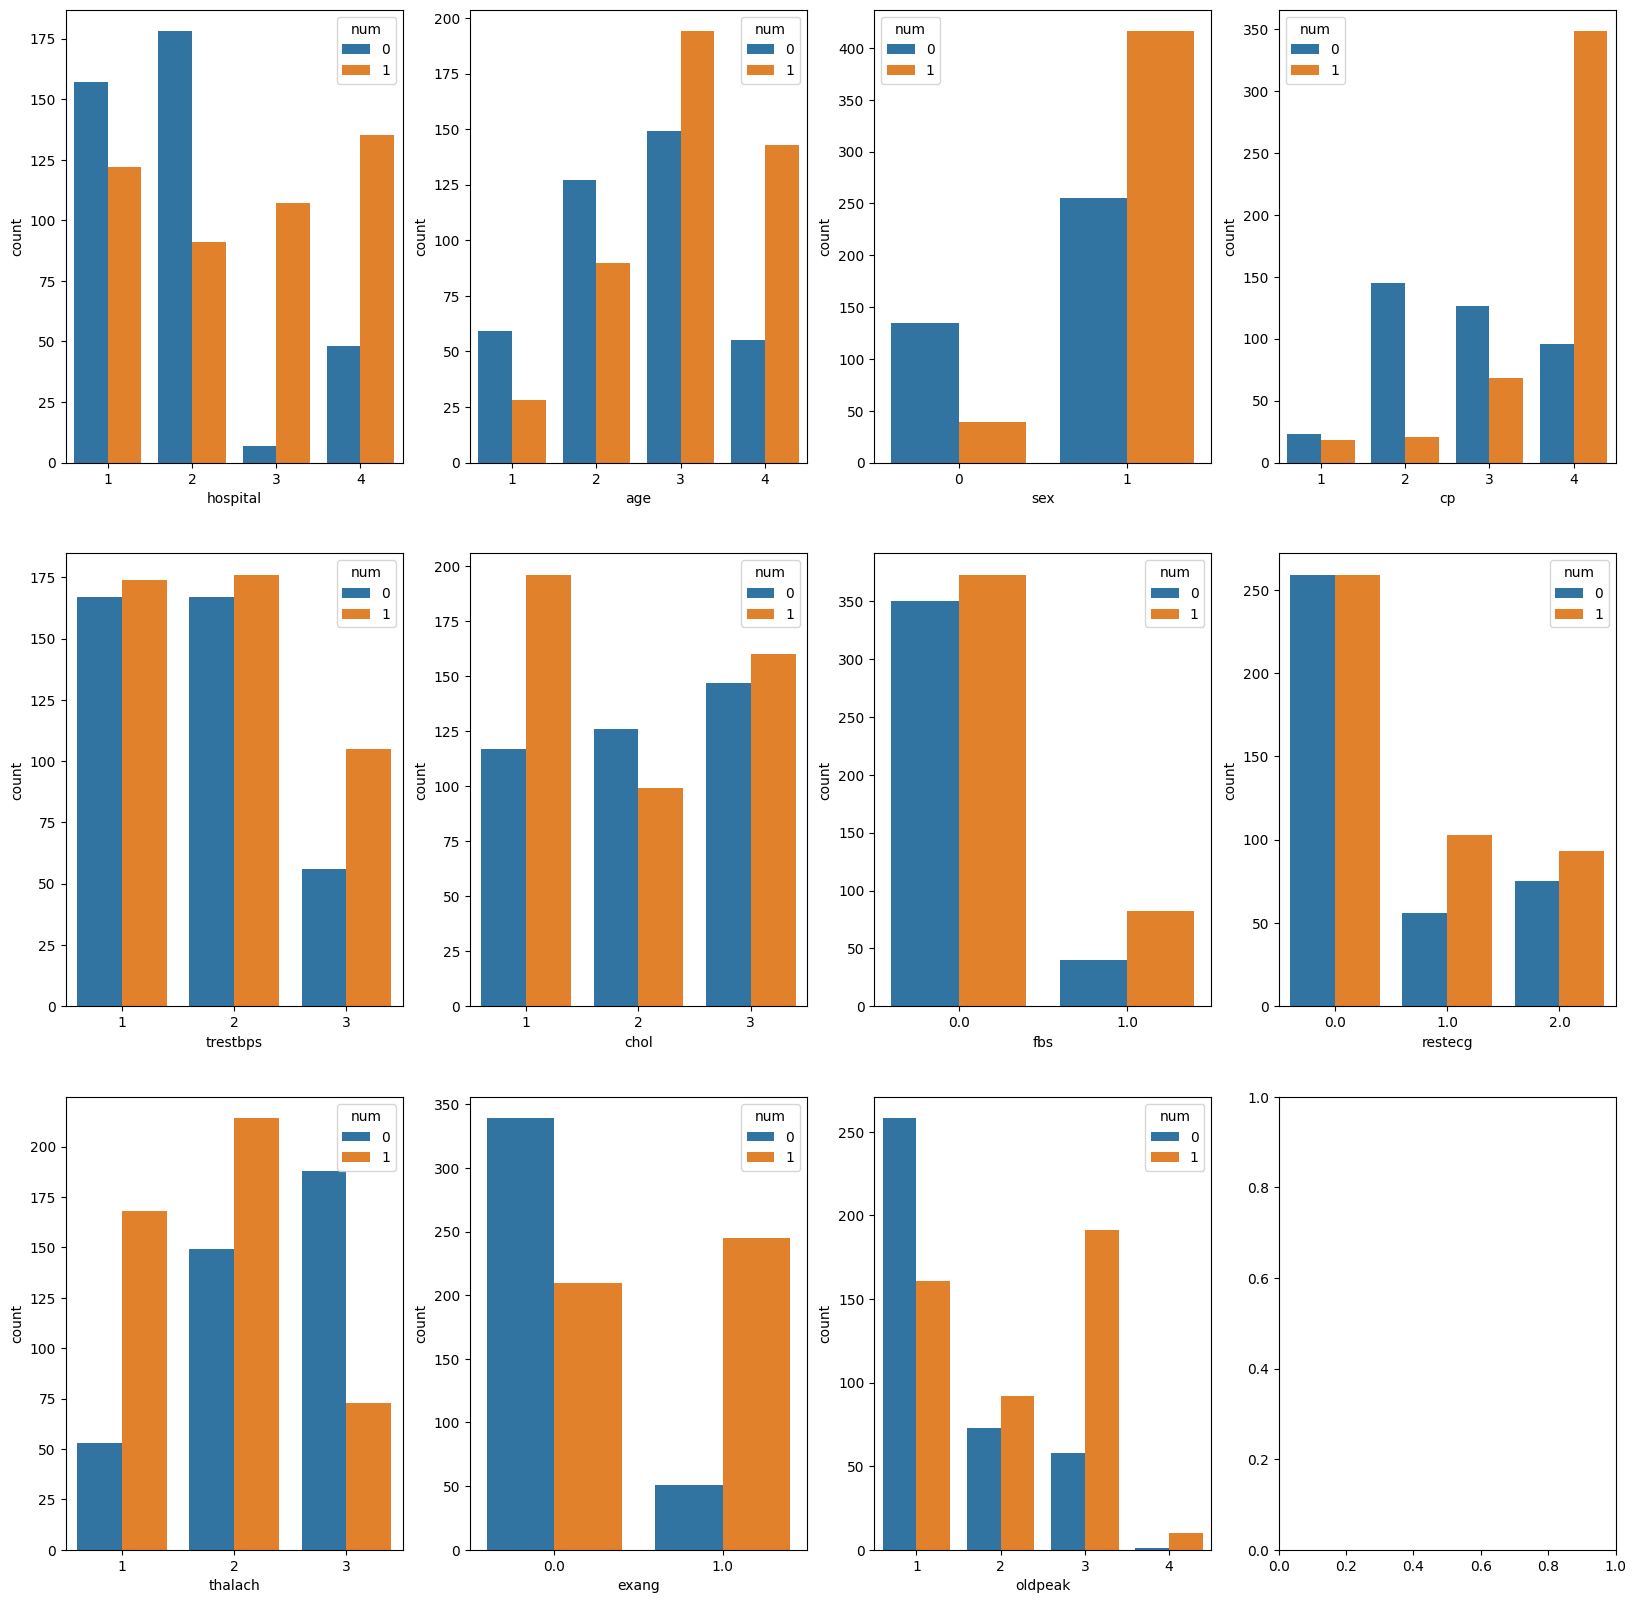

In [ ]:

fig,ax=plt.subplots(3,4,figsize=(20,20))
ax=ax.flatten()
for i in range(0,len(Prep_Disc.columns)-1):
    sns.countplot(data=Prep_Disc,x=Prep_Disc.columns[i],hue="num",ax=ax[i])


Plotting correlation matrix for numerical variables age,trtbps,chol,thalach,oldpeak to see how they correlated they are to each other . We find that they are mostly ucorrelated with the highest magnitude being with age and thalach(max heart beats)

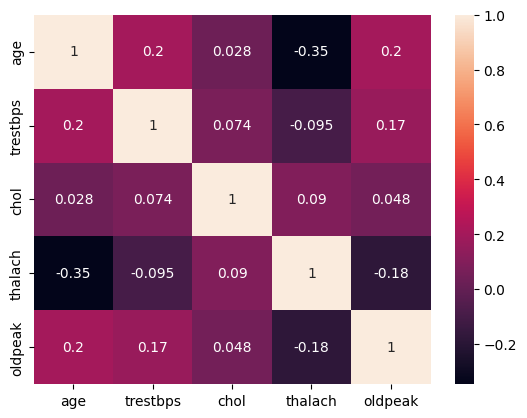

In [ ]:
#plotting correlation matrix for numerical variables age,trtbps,chol,thalach,oldpeak
sns.heatmap(Prep[num_var].corr(),annot=True)
plt.show()


Now we examine if these columns are correlated with the target variable

In [ ]:
#covaariance matrix for num and age,trtbps,chol,thalach,oldpeak
Prep[num_var].corrwith(Prep["num"])

age         0.286710
trestbps    0.068253
chol       -0.030024
thalach    -0.384518
oldpeak     0.351351
dtype: float64

For the various categorical tables we will use the chi2 test to find out what columns may be dependant on each other

In [ ]:

def chi_squared_test(series1, series2):
    # Create contingency table
    contingency_table = pd.crosstab(series1, series2)

    # Calculate observed frequencies
    observed = contingency_table.values

    # Calculate expected frequencies
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    total = row_totals.sum()
    expected = np.outer(row_totals, col_totals) / total

    # Compute chi-squared statistic
    chi_squared_stat = ((observed - expected)**2 / expected).sum()

    # Compute degrees of freedom
    dof = (len(row_totals) - 1) * (len(col_totals) - 1)

    # Compute p-value using chi2 CDF
    p_value = 1 - chi2.cdf(chi_squared_stat, dof)

    return p_value

#performing chi squared test for all the categorical variables
cols=cat_var

picked=[]
for i in cols:
    for j in cols:
        if i!=j and (j,i) not in picked:
            picked.append((i,j))
            p=chi_squared_test(Prep_Disc[i],Prep[j])
            if p<0.05:
                print(i,"and",j,"may be dependent")


hospital and sex may be dependent
hospital and fbs may be dependent
hospital and restecg may be dependent
hospital and exang may be dependent
hospital and cp may be dependent
sex and fbs may be dependent
sex and exang may be dependent
sex and cp may be dependent
fbs and restecg may be dependent
restecg and cp may be dependent
exang and cp may be dependent


In [ ]:
#Prep.drop("hospital",axis=1,inplace=True)

We tried dropping th hospital column as it seems to be related to the largest no of columns here but we had no marked improvement in accuracy for Naive Bayes, Perceptron and ANNs while Extra Trees saw a slight decrease in accuracy hence we decided against dropping this column.

In [ ]:
#performing chi squared test for all the categorical variables
cols=cat_var
for i in cols:
    p=chi_squared_test(Prep_Disc[i],Prep["num"])
    if p<0.05:
        print(i,"and","num","may be dependent")
    else:
        print(i,"and","num","are independent")


hospital and num may be dependent
sex and num may be dependent
fbs and num may be dependent
restecg and num may be dependent
exang and num may be dependent
cp and num may be dependent


We now perform one hot encoding on all the nominal categorical variables

In [ ]:

OHE_Prep=pd.get_dummies(Prep_Disc,columns=cat_var)

In [ ]:
OHE_Prep.fillna(OHE_Prep.mode().iloc[0],inplace=True)
OHE_Prep = OHE_Prep.astype('float32')

<ipython-input-29-15c4afd4e001>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  OHE_Prep.fillna(OHE_Prep.mode().iloc[0],inplace=True)


In [ ]:
OHE_Prep.head()

,age,trestbps,chol,thalach,oldpeak,num,hospital_1,hospital_2,hospital_3,hospital_4,...,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,cp_1,cp_2,cp_3,cp_4
0,4.0,3.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4.0,3.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,2.0,3.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#import test train split
from sklearn.model_selection import train_test_split
np.random.seed(200)

#splitting the data into train and test
X=OHE_Prep.drop("num",axis=1)
y=OHE_Prep["num"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

def f1_score(y,ypred):
    tp=0
    fp=0
    fn=0
    tn=0
    y=np.array(y)

    ypred=np.array(ypred)
    for i in range(len(y)):
        if y[i]==1 and ypred[i]==1:
            tp+=1
        elif y[i]==0 and ypred[i]==1:
            fp+=1
        elif y[i]==1 and ypred[i]==0:
            fn+=1
        else:
            tn+=1


    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_scores=2*precision*recall/(precision+recall)
    accuracy=(tp+tn)/(tp+tn+fp+fn)

    return accuracy,f1_scores

Y_train.value_counts("num")

1.0    0.536982
0.0    0.463018
Name: num, dtype: float64

Defining some functions for evaluating models.The F1 score combines both precision and recall into a single metric, providing a metric to judge a model's ability to make accurate positive predictions while minimizing false positives and false negatives


In [ ]:
def acc_f1_score(y,ypred):
    tp=0
    fp=0
    fn=0
    tn=0
    y=np.array(y)

    ypred=np.array(ypred)
    for i in range(len(y)):
        if y[i]==1 and ypred[i]==1:
            tp+=1
        elif y[i]==0 and ypred[i]==1:
            fp+=1
        elif y[i]==1 and ypred[i]==0:
            fn+=1
        else:
            tn+=1


    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_scores=2*precision*recall/(precision+recall)
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    confusion_matrix=np.array([[tp, fp], [fn, tn]])

    return accuracy,f1_scores,confusion_matrix




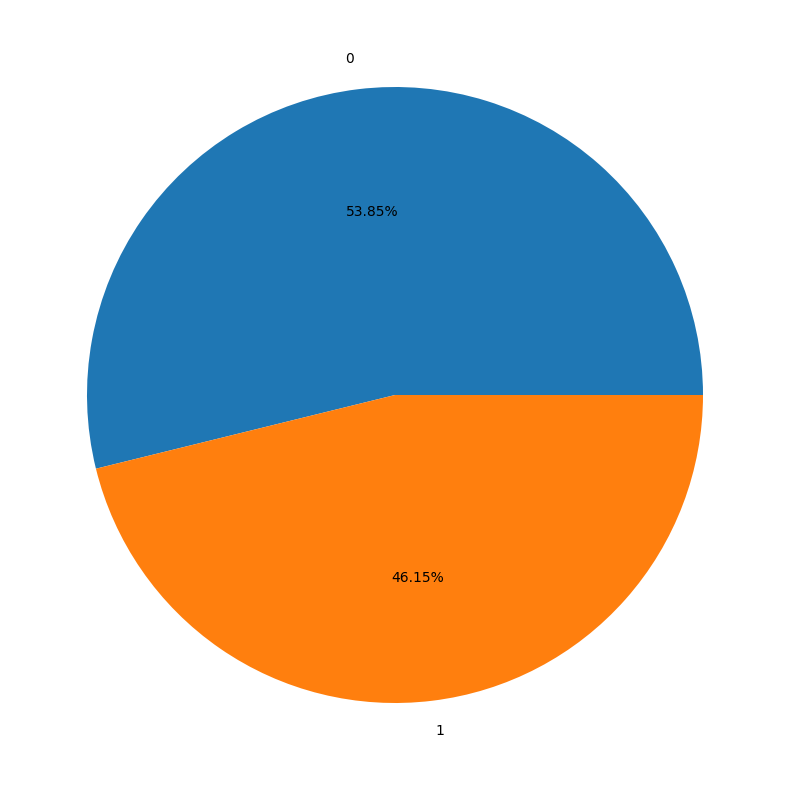

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(Prep["num"].value_counts(),labels=["0","1"],autopct="%1.2f%%")
plt.show()

Checking if the data is still balanced after Preprocessing

# ***2. Naive Bayes***


The prior_prob function identifies the distinct classes within the target variable adn sorts them into a list. Then, it proceeds to compute the prior probabilities for each class. It does this by dividing the count of instances belonging to that class by the total number of instances in the dataset. Thw function outputs a list comprising these calculated prior probabilities, providing the likelihood of occurrence for each class .

In [ ]:

def prior_prob(data_set, targ):
  classes = sorted(list(data_set[targ].unique()))
  prior = []
  for i in classes:
    prior.append(len(data_set[targ] == i)/len(data_set))
  return prior


The likelihood_prob function identifies the available features within the dataset and proceeds to filter the dataset to instances where the target variable matches the specified class label. The next step involves computing the likelihood probability of a particular feature value given the specified class label. This probability is calculated as the ratio of instances where the feature is the specified value and the target variable matches the specified class label to the total count of instances where the target variable corresponds to the specified class label.\
 Finally, the function returns the computed likelihood probability, providing insight into the probability of the feature assuming a specific value when the target variable corresponds to the designated class label.

In [ ]:

def likelihood_prob(data_set, feature, feature_val, targ, label):
  feat = list(data_set.columns)
  df = data_set[data_set[targ] == label]
  p_x_y = (len(df[df[feature] == feature_val]) / len(df))
  return p_x_y



The NB_Category function predicts the target variable using the Naive Bayes method. Here's what it does:

Initial Setup:

Gets a list of feature names from the dataset.
Calculates the prior probabilities for all classes using prior_prob.

Prediction Process:\
Goes through each set of features x in the input.
Calculates likelihood probabilities for each feature value using likelihood_prob.
Making Predictions:

Computes posterior probabilities by combining likelihoods and priors.
Assigns the class with the highest probability as the prediction.


In [ ]:

def NB_Category(data_set, X, targ):
  feat = list(data_set.columns)[:-1]
  prior = prior_prob(data_set, targ)
  targ_pred = []

  for x in X:
    classes = sorted(list(data_set[targ].unique()))
    likelihood = [1]*len(classes)
    for j in range(len(classes)):
      for i in range(len(feat)):
        likelihood[j] *= likelihood_prob(data_set, feat[i], x[i], targ, classes[j])

    post_prob = [1]*len(classes)
    for j in range(len(classes)):
      post_prob[j] = likelihood[j] * prior[j]

    targ_pred.append(np.argmax(post_prob))
  return np.array(targ_pred)



In [ ]:

Y_pred = NB_Category(X_train.join(Y_train), X=X_test.values, targ= "num")


NBacc,NBf1,NBcoonfm=acc_f1_score(Y_test, Y_pred)
print("Accuracy is",NBacc)
print("F1 score is",NBf1)
print("Confusion matrix is \n",NBcoonfm)



Accuracy is 0.7928994082840237
F1 score is 0.8022598870056498
Confusion matrix is 
 [[71 14]
 [21 63]]


# ***3. Perceptron***



This code provides a clear example of training a perceptron on a binary classification task and assessing its performance through accuracy tracking and visualization. The accuracy improvement plot is crucial for understanding how well the model is learning from the data. It uses the batch descent with the perceptron learning rule and a decaying alpaha value that efficiently finds the best values of the weights.

The perceptron class has 3 variables weights , learning rate and accuracies over iterations. The training function shuffles the dataset at the start of each iteration and divides it into batches . It then uses these batches to calulate the error and in turn use the perceptron learning rule to update the weights for each batch.

In [ ]:
x_train=X_train.to_numpy()
y_train=Y_train.to_numpy()
x_test=X_test.to_numpy()
y_test=Y_test.to_numpy()

class Perceptron:
    def __init__(self, num_features, learning_rate=0.001):
        self.weights = np.zeros(num_features)
        self.learning_rate = learning_rate
        self.accuracies = []  # Store accuracies over iterations

    def predict(self, features):
        return 1 if np.dot(self.weights, features) >= 0 else 0

    def train(self, X, y, num_iters, batch_size=32):
        num_samples = len(X)
        for _ in range(num_iters):
            # Shuffle the data
            indices = np.random.permutation(num_samples)
            X = X[indices]
            y = y[indices]


            for i in range(0, num_samples, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                predictions = np.array([self.predict(x) for x in X_batch])
                errors = y_batch - predictions
                self.weights += self.learning_rate * np.dot(errors, X_batch)

            # Calculate accuracy
            predictions = np.array([self.predict(x) for x in X])
            accuracy = np.mean(predictions == y)
            self.accuracies.append(accuracy)

            # Decay the learning rate
            self.learning_rate *= 0.99




In [ ]:


# Train the perceptron and track accuracy
num_features = x_train.shape[1]
perceptron = Perceptron(num_features)
num_iters = 1000

best_accuracy = 0
best_weights = perceptron.weights
no_improvement_streak = 0
for iter in range(num_iters):
    perceptron.train(x_train, y_train, 1)  # Train for 1 iteration
    accuracy = perceptron.accuracies[-1]

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_weights = perceptron.weights
        no_improvement_streak = 0
    else:
        no_improvement_streak += 1
    if no_improvement_streak >= 10:
        print("No improvement for 10 iterations, stopping")
        break


# Evaluate the model
correct = 0
predictions=[]
for i in range(len(x_test)):
    prediction = perceptron.predict(x_test[i])
    predictions.append(prediction)

Pacc,Pf1,Pcoonfm=acc_f1_score(Y_test, predictions)
print("Accuracy is",Pacc)
print("F1 score is",Pf1)
print("Confusion matrix is \n",Pcoonfm)


No improvement for 10 iterations, stopping
Accuracy is 0.7396449704142012
F1 score is 0.8053097345132744
Confusion matrix is 
 [[91 43]
 [ 1 34]]


# ***4. ANN***

In [ ]:

AY_train = Y_train.values.reshape(-1,1)
AY_test = Y_test.values.reshape(-1,1)

def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

def dsigmoid(x):
    z = x * (1 - x)
    return z




The binary crossentropy loss function  incorporates the difference between predicted probabilities and true labels in a binary classification problem and plays a crucial role in backpropagation through its derivative.Since log(0) is not defined epsilon is used to prevent any issues caused by very small probability values. Additionally, the use of `np.clip` ensures that predicted probabilities remain within 1 and 0.

The derivative plays a important role in fine-tuning model parameters, including weights and biases, through optimization algorithms like gradient descent. When combined with the binary crossentropy loss function, it contributes to the step-by-step refinement of model parameters.

In [ ]:
def binary_crossentropy(y_true, y_pred):
    e = 1e-15  # Avoid division by zero
    y_pred = np.clip(y_pred,e,1-e)
    bce = -(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    return bce

def dbinary_crossentropy(y_true, y_pred):
    e = 1e-15  # Avoid division by zero
    y_pred = np.clip(y_pred, e, 1 - e)
    dbce =  (y_pred - y_true) / (y_pred * (1 - y_pred))
    return dbce


This function is utilized to initialize the neural network and assign random weights to the model.

In [ ]:
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    hidden_input_weights = np.random.randn(input_size, hidden_size)
    hidden_biases = np.zeros((1, hidden_size))
    hidden_weights_output = np.random.randn(hidden_size, output_size)
    output_biases = np.zeros((1, output_size))
    return hidden_input_weights, hidden_biases, hidden_weights_output, output_biases


Forward propagation passes input through the various layers of the network to arrive at the output at the outermost neural layer. Here we are using the ReLU funcion as the activation fucntion of the network.

In [ ]:

def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = np.maximum(0, hidden_layer_input)  # ReLU activation
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_layer_input)
    return hidden_layer_input, hidden_layer_output, output_layer_input, predicted_output


The backward_propagation function is the next step in training a neural network. It involves computing the gradients of the loss with respect to the network's parameters for adjusting the weights and biases .It provides the necessary information to update the network's  weights and biases in the direction that reduces the loss. The calculated deltas are used in the subsequent step of parameter updates during optimization.

The update_parameters function adjusts the weights and biases of the network based on the gradients calculated during the backward propagation step. This proceshelps the network learn and improve its performance on the training data.

In [ ]:
def backward_propagation(X, Y, predicted_output, hidden_layer_output, weights_hidden_output):
    output_error = dbinary_crossentropy(Y, predicted_output)
    output_delta = output_error * dsigmoid(predicted_output)
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * (hidden_layer_output > 0)  # ReLU derivative
    return output_delta, hidden_delta

def update_weights(X, hidden_layer_output, output_delta, hidden_delta, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate):
    weights_hidden_output -= learning_rate * hidden_layer_output.T.dot(output_delta)
    biases_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * X.T.dot(hidden_delta)
    biases_hidden -= learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)



The train function represents the training loop of a neural network. By combining the forward and backward propagation steps, as well as parameter updates, it iteratively improves the model's performance.

In [ ]:

def train(X_train, Y_train, epochs, batch_size, learning_rate):
    input_size = X_train.shape[1]
    hidden_size = 5
    output_size = 1

    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        total_samples = len(X_train)
        for i in range(0, total_samples, batch_size):
            X_batch = X_train[i:i + batch_size]
            Y_batch = Y_train[i:i + batch_size]

            hidden_layer_input, hidden_layer_output, output_layer_input, predicted_output = forward_propagation(
                X_batch, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

            loss = binary_crossentropy(Y_batch, predicted_output)

            output_delta, hidden_delta = backward_propagation(X_batch, Y_batch, predicted_output, hidden_layer_output,weights_hidden_output)

            update_weights(X_batch, hidden_layer_output, output_delta, hidden_delta, weights_input_hidden,biases_hidden, weights_hidden_output, biases_output, learning_rate)

        predicted_train = predict(X_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
        predicted_train = (predicted_train > 0.5).astype(int)  # Convert to binary



    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

def predict(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    _, _, _, predicted_output = forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
    return predicted_output



Here we run the model for a 200 epochs with a batch size of 100 and learning rate of 0.001

In [ ]:

epochs = 200
batch_size = 10
learning_rate = 0.001


weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = train(X_train, AY_train, epochs, batch_size, learning_rate)


predicted_train = predict(X_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
predicted_test = predict(X_test, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

predicted_train = (predicted_train > 0.5).astype(int)
predicted_test = (predicted_test > 0.5).astype(int)

ANacc,ANf1,ANcoonfm=acc_f1_score(Y_test, predicted_test)
print("Accuracy is",ANacc)
print("F1 score is",ANf1)
print("Confusion matrix is \n",ANcoonfm)

Accuracy is 0.7633136094674556
F1 score is 0.7752808988764044
Confusion matrix is 
 [[69 17]
 [23 60]]


# ***5. Extremely Randomized Trees (Extra Trees)***

As per results obtained by "Cardiovascular Disease Prediction System Using Extra Trees Classifier" by Shafique et al. we realized that extra trees would be the ideal model for this dataset. They obtained accuraccies of 90%, 88%, 87% and 86% for  Extra trees , Logistic Classifier,  SVM , and Naive Bayes classifiers respectively.

The Extra trees model is an ensemble that utilizes Decision Trees in a way similiar to random forests, it too creates multiple trees on the same data and uses a voting mechanism to determine the class of each example. It also randomly selects a subset of features at every node to decide the split.

Where it differs from random forests is that Extra trees do not perform any kind of bootstrapping and instead build each tree on the entire dataset . Also where a random forest would choose the best split point for each feature using a heuristic like information gain extra trees selects the split point by random choice too.This  added randomness allows for us to reduce the variance of the model while slightly increasing the bias.


Here I am defining some functions that I will use in my Extra Trees Model . The first one calculates the entropy(disorder) of a set of data based on a specific column while the other is jus used to make predictions based on trees

In [ ]:

def entropy_function(df,target):
    entropy=0
    for i in df[target].unique():
        p_i=df[target].value_counts(normalize=True)[i]
        entropy+=-p_i*np.log2(p_i)
    return entropy


def predict_row(tree, row):
    if not isinstance(tree, dict):
        return tree
    for feature, subtree in tree.items():
        if feature in row:
            return predict_row(subtree.get(row[feature]), row)
    return None

def predict_row_et(tree, row):
    if not isinstance(tree, dict):
        return tree
    for (feature, category), subtree in tree.items():
        if feature in row:
            if row[feature] == category:
                return predict_row(subtree[0], row)
            else:
                return predict_row(subtree[1], row)
    return None

def extra_trees_prediction(trees, df):
    predictions = []
    for _, row in df.iterrows():
        pred = []
        for tree in trees:
            prediction = predict_row_et(tree, row)
            if prediction is not None:
                pred.append(prediction)
        if pred:
            predictions.append(max(set(pred), key=pred.count))
        else:
            predictions.append(None)
    return predictions



Building the tree. max_depth is how deep a tree is allowed to build while min_samples_split determines how many  samples a node must have to be valid for further splitting and min_sample_leaf is the min number of samples a leaf must have . K is the number of fatures chosen at random for every split adn is by default the sqrt of the number of training features.

In [ ]:


def extra_tree(df, target, max_depth, min_samples_split=30, min_samples_leaf=15, k=None):

    if max_depth == 0 or df[target].nunique() == 1 or len(df) < min_samples_split:
        return df[target].value_counts().idxmax()

    else:
        if k is None:
            k = int(np.sqrt(len(df.columns) - 1))  # default to sqrt of number of features

        features = np.random.choice(df.columns[df.columns != target], size=k, replace=False)

        best_feature, best_split, best_entropy = None, None, np.inf
        for feature in features:
            # Choose a random split point for the feature
            split = df[feature].sample(1).iloc[0]
            left_df = df[df[feature] <= split]
            right_df = df[df[feature] > split]
            entropy = len(left_df) * entropy_function(left_df, target) + len(right_df) * entropy_function(right_df, target)
            if entropy < best_entropy:
                #choose random feature and split point that gives the lowest entropy
                best_entropy = entropy
                best_feature = feature
                best_split = split
        if best_feature is None:  # no valid split found
            return df[target].value_counts().idxmax()
        else:
            #creating subtrees
            left_df = df[df[best_feature] <= best_split]
            right_df = df[df[best_feature] > best_split]
            if len(left_df) < min_samples_leaf or len(right_df) < min_samples_leaf:
                return df[target].value_counts().idxmax()
            else:
                return {(best_feature, best_split): [extra_tree(left_df, target, max_depth - 1, min_samples_split, min_samples_leaf, k),
                                                     extra_tree(right_df, target, max_depth - 1, min_samples_split, min_samples_leaf, k)]}




Creating the extra tree classifier by creating a large number of extra trees

In [ ]:
def extra_trees(df, target, n_trees, max_depth):
    trees = []
    for i in range(n_trees):
        sample = df.sample(len(df), replace=True)
        tree = extra_tree(sample, target, max_depth)
        trees.append(tree)
    return trees


treeeee=extra_trees(X_train.join(Y_train),"num",1000,3)
pred_val=extra_trees_prediction(treeeee,X_test)
Dacc,Df1,Dcoonfm=acc_f1_score(Y_test, pred_val)
print("Accuracy is",Dacc)
print("F1 score is",Df1)
print("Confusion matrix is \n",Dcoonfm)

The accuracy of the model does not reach the levels displayed in the paper and we have a few possible explanations for it . Our code is not very effcient especially the entropy calculation and sub tree formation . This limits the feasibility of creating enough trees such that the we cover all possible combinations of splitting. We also have not been able to implement any kind of post pruning which may also benefit the accuracy of the model . Our feature selection could also have been another issue.

# ***6. Comparison of insights drawn from the models***

In [ ]:
#comparing the various accuracies and fscores already defined
accuracies = [NBacc, Pacc, ANacc, Dacc]
fscores = [NBf1, Pf1, ANf1, Df1]
models=["Naive Bayes","Perceptron","ANN","Extra Trees"]
#pretty printing these accuracies and fscore values
for i in range(len(accuracies)):
    print("Accuracy of",models[i],"is",accuracies[i])
    print("F1 score of",models[i],"is",fscores[i])
    print()


In [ ]:
#printing the confusion matrices of the models
print("Confusion matrix of Naive Bayes is \n",NBcoonfm)
print("Confusion matrix of Perceptron is \n",Pcoonfm)
print("Confusion matrix of ANN is \n",ANcoonfm)
print("Confusion matrix of Extra Trees is \n",Dcoonfm)

On comparing the accuracies and fscores of the various models we see that all the models bar ANN display the exact same Fscore. In terms of accuracy the Naive Bayes model is the best while ANN is a close second . While perceptron might be our worst performer in terms of accuracy the extra trees model displays a great variance in accuracy from run to run due to the random nature of the model being compounded by the fact that we are using a relatively small number of shallow trees.

The results we have obtained seem to indicate that the Naive Bayes model would be the best classifier for this data which seems to be diametrically oppossed to the paper we cited earlier. However this may just be due to the relative simplicity and ease of implementing the Naive Bayes model as compared to the other models. The perceptron on the other hand may be too simple a model to actually capture the complexity of the data.

The ANN model second to the Naive Bayes model and may be a better choice if we had more data to train on and tuned the hyperparameters better. The Extra Trees model is a good choice for this data as indicated by the paper but we have not been able to implement it to its full potential and hence it is not performing as well as it should.

In [ ]:


df = pd.DataFrame({
    'Naive Bayes': [NBacc, NBf1],
    'Perceptron': [Pacc, Pf1],
    'ANN': [ANacc, ANf1],
    'Extra Trees': [Dacc, Df1]
}, index=['Accuracy', 'Fscore'])



df_melt = df.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
sns.barplot(x='Model', y='Score', hue='index', data=df_melt)

plt.show()



# **_7. References_**

1. [Numpy Documentation](https://numpy.org/doc/)
2. [Pandas Documentation](https://pandas.pydata.org/docs/)
3. [Matplotlib Documentation](https://matplotlib.org/3.3.3/contents.html)
4. [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
5. [Risk Factors for Coronary Artery Disease](https://www.ncbi.nlm.nih.gov/books/NBK554410/)
6. [Cardiovascular Disease Prediction System Using Extra Trees Classifier](https://www.researchgate.net/publication/344029928_Cardiovascular_Disease_Prediction_System_Using_Extra_Trees_Classifier)
7. [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)
8. Geurts, P., Ernst, D. & Wehenkel, L. Extremely randomized trees. Mach Learn 63, 3–42 (2006). https://doi.org/10.1007/s10994-006-6226-1
9. [Andrew Ng's Notes on Neural Networks](https://github.com/ashishpatel26/Andrew-NG-Notes/blob/master/andrewng-p-1-neural-network-deep-learning.md)
10. [Machine Learning Mastery](https://machinelearningmastery.com/)
11. [The Perceptron Algorithm: From Scratch Using Python](https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html)
12. [Naive Bayes Classifier from Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)
13. [Neural Network from scratch in Python](https://towardsdatascience.com/neural-network-from-scratch-in-python-7b3dca6f8f17)
14. [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

